In [ ]:
#!pip install linearmodels

In [ ]:
import numpy as np
import pandas as pd
#import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

#from linearmodels import PooledOLS
#import statsmodels.api as sm

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd "drive/My Drive/Data/GC_Data2022"

/content/drive/My Drive/Data/GC_Data2022


In [ ]:
data = pd.read_excel("Copy of Train_data.xlsx")

In [ ]:
data.head()

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,Wh-1,NORTH,SKU-1,27.0,13.0,30.0,14.0,22.0,8.0,8.0,...,12.0,8.0,8.0,8.0,8.0,8.0,14.0,16.0,8.0,12.0
1,Wh-1,NORTH,SKU-2,88.0,28.0,127.0,130.0,58.0,10.0,7.0,...,16.0,7.0,7.0,7.0,7.0,7.0,13.0,43.0,13.0,43.0
2,Wh-1,NORTH,SKU-3,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,8.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,26.0,6.0
3,Wh-1,NORTH,SKU-4,162.0,184.0,110.0,172.0,90.0,40.0,18.0,...,82.0,78.0,38.0,18.0,22.0,28.0,36.0,352.0,58.0,18.0
4,Wh-1,NORTH,SKU-5,171.0,402.0,627.0,615.0,300.0,417.0,141.0,...,468.0,216.0,75.0,6.0,30.0,66.0,141.0,699.0,183.0,24.0


In [ ]:
data["Q1"] = data.quantile(q=0.25, axis=1)
data["Q3"] = data.quantile(q=0.75, axis=1)
#data["std"] = data[data.columns[3:]].std(axis=1)
data["L"] = data["Q1"] - 1.5*(data["Q3"] - data["Q1"])
data["U"] = data["Q3"] + 1.5*(data["Q3"] - data["Q1"])
data.head()

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,Q1,Q3,L,U
0,Wh-1,NORTH,SKU-1,27.0,13.0,30.0,14.0,22.0,8.0,8.0,...,8.0,8.0,14.0,16.0,8.0,12.0,8.00,14.0,-1.000,23.000
1,Wh-1,NORTH,SKU-2,88.0,28.0,127.0,130.0,58.0,10.0,7.0,...,7.0,7.0,13.0,43.0,13.0,43.0,7.00,59.5,-71.750,138.250
2,Wh-1,NORTH,SKU-3,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,8.0,26.0,6.0,6.00,6.0,6.000,6.000
3,Wh-1,NORTH,SKU-4,162.0,184.0,110.0,172.0,90.0,40.0,18.0,...,22.0,28.0,36.0,352.0,58.0,18.0,26.50,107.0,-94.250,227.750
4,Wh-1,NORTH,SKU-5,171.0,402.0,627.0,615.0,300.0,417.0,141.0,...,30.0,66.0,141.0,699.0,183.0,24.0,54.75,409.5,-477.375,941.625


In [ ]:
d = data.iloc[0].copy()
for i in range(3, 41):
  d[i] = np.log(d[i])

(array([21.,  0., 10.,  1.,  2.,  1.,  2.,  0.,  0.,  1.]),
 array([2.0794415416798357, 2.2685265788670645, 2.457611616054293,
        2.6466966532415217, 2.8357816904287505, 3.024866727615979,
        3.2139517648032077, 3.403036801990436, 3.592121839177665,
        3.7812068763648936, 3.970291913552122], dtype=object),
 <a list of 10 Patch objects>)

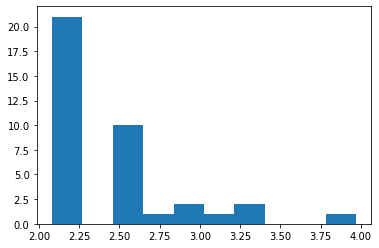

In [ ]:
plt.hist(d[3:])

In [ ]:
from scipy import stats

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 38.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([-1.74384691, -1.51217418, -1.28050145, -1.04882872, -0.81715599,
        -0.58548326, -0.35381053, -0.1221378 ,  0.10953493,  0.34120766,
         0.57288039]),
 <a list of 2 Lists of Patches objects>)

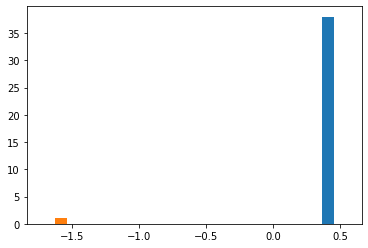

In [ ]:
d2 = data.iloc[0, 3:].copy().tolist()
d3 = stats.boxcox(d2)
plt.hist(d3)

In [ ]:
d2[3:].shape

(38,)

(array([25.,  7.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([8.0, 12.5, 17.0, 21.5, 26.0, 30.5, 35.0, 39.5, 44.0, 48.5, 53.0],
       dtype=object),
 <a list of 10 Patch objects>)

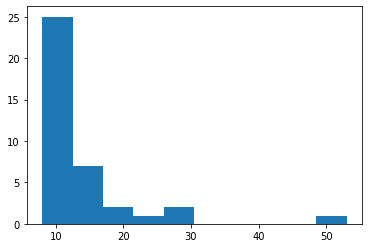

In [ ]:
plt.hist(data.iloc[0, 3:])

In [ ]:
data.iloc[0]

Warehouse id            Wh-1
Region                 NORTH
SKU id                 SKU-1
2018-04-01 00:00:00     27.0
2018-05-01 00:00:00     13.0
2018-06-01 00:00:00     30.0
2018-07-01 00:00:00     14.0
2018-08-01 00:00:00     22.0
2018-09-01 00:00:00      8.0
2018-10-01 00:00:00      8.0
2018-11-01 00:00:00      8.0
2018-12-01 00:00:00      8.0
2019-01-01 00:00:00      8.0
2019-02-01 00:00:00      8.0
2019-03-01 00:00:00     13.0
2019-04-01 00:00:00     53.0
2019-05-01 00:00:00     19.0
2019-06-01 00:00:00      8.0
2019-07-01 00:00:00     12.0
2019-08-01 00:00:00     14.0
2019-09-01 00:00:00     12.0
2019-10-01 00:00:00     18.0
2019-11-01 00:00:00      8.0
2019-12-01 00:00:00      8.0
2020-01-01 00:00:00      8.0
2020-02-01 00:00:00      8.0
2020-03-01 00:00:00     14.0
2020-04-01 00:00:00      8.0
2020-05-01 00:00:00      9.0
2020-06-01 00:00:00      8.0
2020-07-01 00:00:00      8.0
2020-08-01 00:00:00     12.0
2020-09-01 00:00:00      8.0
2020-10-01 00:00:00      8.0
2020-11-01 00:

In [ ]:
df=data.drop(columns=['Warehouse id','SKU id','Region'])
df=df.transpose()
df['date'] = pd.date_range('04/01/2018', periods = 38, freq ='M')
df=df.set_index('date')
df = df.stack().reset_index()
df = df.rename(columns={0: 'Sales', 'level_1': 'SKU id'})
conditions = [
    (df['SKU id'] < 233),
    (df['SKU id'] >= 233) & (df['SKU id'] < 445),
    (df['SKU id'] >= 445) & (df['SKU id'] < 753),
    (df['SKU id'] >= 753)
]

values = ['NORTH', 'EAST', 'WEST', 'SOUTH']

df['Region'] = np.select(conditions, values)


In [ ]:
df.head()

,date,SKU id,Sales,Region
0,2018-04-30,0,27.0,NORTH
1,2018-04-30,1,88.0,NORTH
2,2018-04-30,2,6.0,NORTH
3,2018-04-30,3,162.0,NORTH
4,2018-04-30,4,171.0,NORTH


In [ ]:
# exog = sm.tools.tools.add_constant()
# endog = dataset['violent']
# mod = PooledOLS(endog, exog)
# pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# # Store values for checking homoskedasticity graphically
# fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
# residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
data['SKU id'].nunique()

408

In [ ]:
# table = pd.pivot_table(df, values=['Sales', 'Region'], index = ['SKU id', 'date'])
# table

In [ ]:
# table['Sales_t-1'] = table['Sales'].shift(1)
# table.head(40)

In [ ]:
#df.head()

In [ ]:
#number of time periods
T = data.shape[1] - 3
T

38

In [ ]:
# def lambda_i_rho(y, rho, T):
#   s = 0
#   for i in range(1, T):
#     s += y[i] - rho*y[i-1]
#   return s/T

In [ ]:
df.shape

(39482, 4)

In [ ]:
df.dtypes

date      datetime64[ns]
SKU id             int64
Sales            float64
Region            object
dtype: object

In [ ]:
data['Id'] = data['SKU id'] + "_" + data['Region']
data.head()

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,Id
0,Wh-1,NORTH,SKU-1,27.0,13.0,30.0,14.0,22.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,14.0,16.0,8.0,12.0,SKU-1_NORTH
1,Wh-1,NORTH,SKU-2,88.0,28.0,127.0,130.0,58.0,10.0,7.0,...,7.0,7.0,7.0,7.0,7.0,13.0,43.0,13.0,43.0,SKU-2_NORTH
2,Wh-1,NORTH,SKU-3,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,8.0,26.0,6.0,SKU-3_NORTH
3,Wh-1,NORTH,SKU-4,162.0,184.0,110.0,172.0,90.0,40.0,18.0,...,78.0,38.0,18.0,22.0,28.0,36.0,352.0,58.0,18.0,SKU-4_NORTH
4,Wh-1,NORTH,SKU-5,171.0,402.0,627.0,615.0,300.0,417.0,141.0,...,216.0,75.0,6.0,30.0,66.0,141.0,699.0,183.0,24.0,SKU-5_NORTH


In [ ]:
#data[data['Region'] == 'EAST']['SKU id'].tolist()

In [ ]:
data.shape

(1039, 42)

In [ ]:
1039*38

39482

In [ ]:
data = data.drop(["Warehouse id", "SKU id", "Region"], axis = 1)
data = data.set_index("Id")
data = data.T
data.head()

Id,SKU-1_NORTH,SKU-2_NORTH,SKU-3_NORTH,SKU-4_NORTH,SKU-5_NORTH,SKU-6_NORTH,SKU-7_NORTH,SKU-8_NORTH,SKU-9_NORTH,SKU-10_NORTH,...,SKU-221_SOUTH,SKU-224_SOUTH,SKU-225_SOUTH,SKU-226_SOUTH,SKU-228_SOUTH,SKU-229_SOUTH,SKU-230_SOUTH,SKU-231_SOUTH,SKU-232_SOUTH,SKU-233_SOUTH
2018-04-01 00:00:00,27.0,88.0,6.0,162.0,171.0,4.0,1179.0,406.0,264.0,8.0,...,32.0,118.0,145.0,4.0,15.0,7.0,49.0,21.0,15.0,252.0
2018-05-01 00:00:00,13.0,28.0,6.0,184.0,402.0,4.0,435.0,652.0,244.0,8.0,...,24.0,139.0,65.0,36.0,15.0,7.0,25.0,13.0,13.0,105.0
2018-06-01 00:00:00,30.0,127.0,6.0,110.0,627.0,4.0,335.0,844.0,159.0,8.0,...,22.0,56.0,157.0,40.0,15.0,7.0,41.0,13.0,13.0,33.0
2018-07-01 00:00:00,14.0,130.0,6.0,172.0,615.0,52.0,719.0,541.0,204.0,8.0,...,36.0,61.0,225.0,20.0,15.0,7.0,13.0,21.0,11.0,39.0
2018-08-01 00:00:00,22.0,58.0,6.0,90.0,300.0,4.0,791.0,703.0,84.0,8.0,...,46.0,131.0,81.0,4.0,15.0,7.0,21.0,29.0,9.0,15.0


In [ ]:
# def region_wise(df, r="ALL"):
#   cols = df.columns
#   for idx, row in df.iterrows():
#     sum = 0
#     for col in cols:
#       if r == "ALL":
#         sum += row[col]
#       else:
#         if col.split("_")[1] == r:
#           sum += row[col]

#     row[r] = sum

In [ ]:
# data["ALL"] = 0
# data["WEST"] = 0
# Data["EAST"] = 0
# data["NORTH"] = 0
# data["SOUTH"] = 0

In [ ]:
# region_wise(data)
# region_wise(data, "NORTH")
# region_wise(data, "SOUTH")
# region_wise(data, "EAST")
# region_wise(data, "WEST")
# data.head()

In [ ]:
data.head()

Id,SKU-1_NORTH,SKU-2_NORTH,SKU-3_NORTH,SKU-4_NORTH,SKU-5_NORTH,SKU-6_NORTH,SKU-7_NORTH,SKU-8_NORTH,SKU-9_NORTH,SKU-10_NORTH,...,SKU-221_SOUTH,SKU-224_SOUTH,SKU-225_SOUTH,SKU-226_SOUTH,SKU-228_SOUTH,SKU-229_SOUTH,SKU-230_SOUTH,SKU-231_SOUTH,SKU-232_SOUTH,SKU-233_SOUTH
2018-04-01 00:00:00,27.0,88.0,6.0,162.0,171.0,4.0,1179.0,406.0,264.0,8.0,...,32.0,118.0,145.0,4.0,15.0,7.0,49.0,21.0,15.0,252.0
2018-05-01 00:00:00,13.0,28.0,6.0,184.0,402.0,4.0,435.0,652.0,244.0,8.0,...,24.0,139.0,65.0,36.0,15.0,7.0,25.0,13.0,13.0,105.0
2018-06-01 00:00:00,30.0,127.0,6.0,110.0,627.0,4.0,335.0,844.0,159.0,8.0,...,22.0,56.0,157.0,40.0,15.0,7.0,41.0,13.0,13.0,33.0
2018-07-01 00:00:00,14.0,130.0,6.0,172.0,615.0,52.0,719.0,541.0,204.0,8.0,...,36.0,61.0,225.0,20.0,15.0,7.0,13.0,21.0,11.0,39.0
2018-08-01 00:00:00,22.0,58.0,6.0,90.0,300.0,4.0,791.0,703.0,84.0,8.0,...,46.0,131.0,81.0,4.0,15.0,7.0,21.0,29.0,9.0,15.0


In [ ]:
# cols = data.columns
# for idx, row in data.iterrows():
#   sum = 0
#   for col in cols:
#     sum += row[col]
#   row["ALL"] = sum

In [ ]:
data["ALL"] = data.sum(axis=1)
data.head()

Id,SKU-1_NORTH,SKU-2_NORTH,SKU-3_NORTH,SKU-4_NORTH,SKU-5_NORTH,SKU-6_NORTH,SKU-7_NORTH,SKU-8_NORTH,SKU-9_NORTH,SKU-10_NORTH,...,SKU-224_SOUTH,SKU-225_SOUTH,SKU-226_SOUTH,SKU-228_SOUTH,SKU-229_SOUTH,SKU-230_SOUTH,SKU-231_SOUTH,SKU-232_SOUTH,SKU-233_SOUTH,ALL
2018-04-01 00:00:00,27.0,88.0,6.0,162.0,171.0,4.0,1179.0,406.0,264.0,8.0,...,118.0,145.0,4.0,15.0,7.0,49.0,21.0,15.0,252.0,257779.0
2018-05-01 00:00:00,13.0,28.0,6.0,184.0,402.0,4.0,435.0,652.0,244.0,8.0,...,139.0,65.0,36.0,15.0,7.0,25.0,13.0,13.0,105.0,225281.0
2018-06-01 00:00:00,30.0,127.0,6.0,110.0,627.0,4.0,335.0,844.0,159.0,8.0,...,56.0,157.0,40.0,15.0,7.0,41.0,13.0,13.0,33.0,217311.0
2018-07-01 00:00:00,14.0,130.0,6.0,172.0,615.0,52.0,719.0,541.0,204.0,8.0,...,61.0,225.0,20.0,15.0,7.0,13.0,21.0,11.0,39.0,163865.0
2018-08-01 00:00:00,22.0,58.0,6.0,90.0,300.0,4.0,791.0,703.0,84.0,8.0,...,131.0,81.0,4.0,15.0,7.0,21.0,29.0,9.0,15.0,181704.0


In [ ]:
my_dict = {}
my_dict["N"] = []
my_dict["E"] = []
my_dict["S"] = []
my_dict["W"] = []

for col in data.columns:
  try: 
    col.split("_")[1]
    if col.split("_")[1] == "NORTH":
      my_dict["N"].append(col)
    elif col.split("_")[1] == "EAST":
      my_dict["E"].append(col)
    elif col.split("_")[1] == "SOUTH":
      my_dict["S"].append(col)
    elif col.split("_")[1] == "WEST":
      my_dict["W"].append(col)

  except:
    print(col)

ALL


In [ ]:
data["N"] = data[my_dict["N"]].sum(axis=1)
data.head()

Id,SKU-1_NORTH,SKU-2_NORTH,SKU-3_NORTH,SKU-4_NORTH,SKU-5_NORTH,SKU-6_NORTH,SKU-7_NORTH,SKU-8_NORTH,SKU-9_NORTH,SKU-10_NORTH,...,SKU-225_SOUTH,SKU-226_SOUTH,SKU-228_SOUTH,SKU-229_SOUTH,SKU-230_SOUTH,SKU-231_SOUTH,SKU-232_SOUTH,SKU-233_SOUTH,ALL,N
2018-04-01 00:00:00,27.0,88.0,6.0,162.0,171.0,4.0,1179.0,406.0,264.0,8.0,...,145.0,4.0,15.0,7.0,49.0,21.0,15.0,252.0,257779.0,76533.0
2018-05-01 00:00:00,13.0,28.0,6.0,184.0,402.0,4.0,435.0,652.0,244.0,8.0,...,65.0,36.0,15.0,7.0,25.0,13.0,13.0,105.0,225281.0,62588.0
2018-06-01 00:00:00,30.0,127.0,6.0,110.0,627.0,4.0,335.0,844.0,159.0,8.0,...,157.0,40.0,15.0,7.0,41.0,13.0,13.0,33.0,217311.0,59830.0
2018-07-01 00:00:00,14.0,130.0,6.0,172.0,615.0,52.0,719.0,541.0,204.0,8.0,...,225.0,20.0,15.0,7.0,13.0,21.0,11.0,39.0,163865.0,49216.0
2018-08-01 00:00:00,22.0,58.0,6.0,90.0,300.0,4.0,791.0,703.0,84.0,8.0,...,81.0,4.0,15.0,7.0,21.0,29.0,9.0,15.0,181704.0,54348.0


In [ ]:
data["E"] = data[my_dict["E"]].sum(axis=1)
data["S"] = data[my_dict["S"]].sum(axis=1)
data["W"] = data[my_dict["W"]].sum(axis=1)
data.head()

Id,SKU-1_NORTH,SKU-2_NORTH,SKU-3_NORTH,SKU-4_NORTH,SKU-5_NORTH,SKU-6_NORTH,SKU-7_NORTH,SKU-8_NORTH,SKU-9_NORTH,SKU-10_NORTH,...,SKU-229_SOUTH,SKU-230_SOUTH,SKU-231_SOUTH,SKU-232_SOUTH,SKU-233_SOUTH,ALL,N,E,S,W
2018-04-01 00:00:00,27.0,88.0,6.0,162.0,171.0,4.0,1179.0,406.0,264.0,8.0,...,7.0,49.0,21.0,15.0,252.0,257779.0,76533.0,57764.0,80025.0,43457.0
2018-05-01 00:00:00,13.0,28.0,6.0,184.0,402.0,4.0,435.0,652.0,244.0,8.0,...,7.0,25.0,13.0,13.0,105.0,225281.0,62588.0,55823.0,63604.0,43266.0
2018-06-01 00:00:00,30.0,127.0,6.0,110.0,627.0,4.0,335.0,844.0,159.0,8.0,...,7.0,41.0,13.0,13.0,33.0,217311.0,59830.0,59302.0,53031.0,45148.0
2018-07-01 00:00:00,14.0,130.0,6.0,172.0,615.0,52.0,719.0,541.0,204.0,8.0,...,7.0,13.0,21.0,11.0,39.0,163865.0,49216.0,34798.0,41886.0,37965.0
2018-08-01 00:00:00,22.0,58.0,6.0,90.0,300.0,4.0,791.0,703.0,84.0,8.0,...,7.0,21.0,29.0,9.0,15.0,181704.0,54348.0,32181.0,48282.0,46893.0


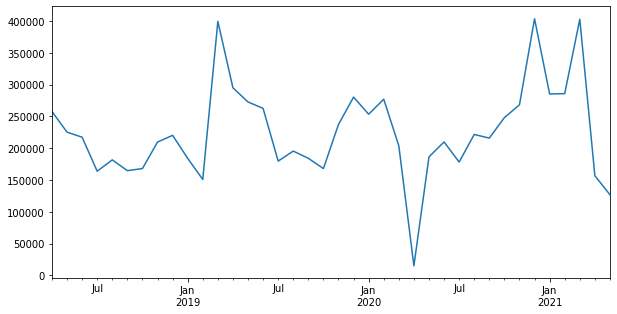

In [ ]:
data["ALL"].plot(figsize=(10,5))